# Radioflux Data

https://lasp.colorado.edu/lisird/data/noaa_radio_flux/

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [6]:
df = pd.read_csv (r'Data/noaa_radio_flux.csv', delimiter=',')
df.head()

,time (yyyyMMdd),f107_adjusted (solar flux unit (SFU)),f107_observed (solar flux unit (SFU))
0,19470214,253.9,260.4
1,19470217,228.5,234.2
2,19470219,178.8,183.1
3,19470220,163.7,167.4
4,19470224,164.1,167.7


In [19]:
time = pd.to_datetime(df['time (yyyyMMdd)'], format='%Y%m%d')
flux_adj = df['f107_adjusted (solar flux unit (SFU))']
flux_obs = df['f107_observed (solar flux unit (SFU))']

In [28]:
from scipy.signal import savgol_filter

In [34]:
window_length = int(4*365) + 1 # the number of coefficients --> must be odd
poly_order = [1, 2, 4] # order of the polynomial used to fit the samples
color = ['deeppink', 'tab:blue', 'tab:green', 'lightgrey']
zorder = [99, 98, 97]
size = len(poly_order)
smoothed = [savgol_filter(flux_adj, window_length, poly_order[i]) for i in range(size)]

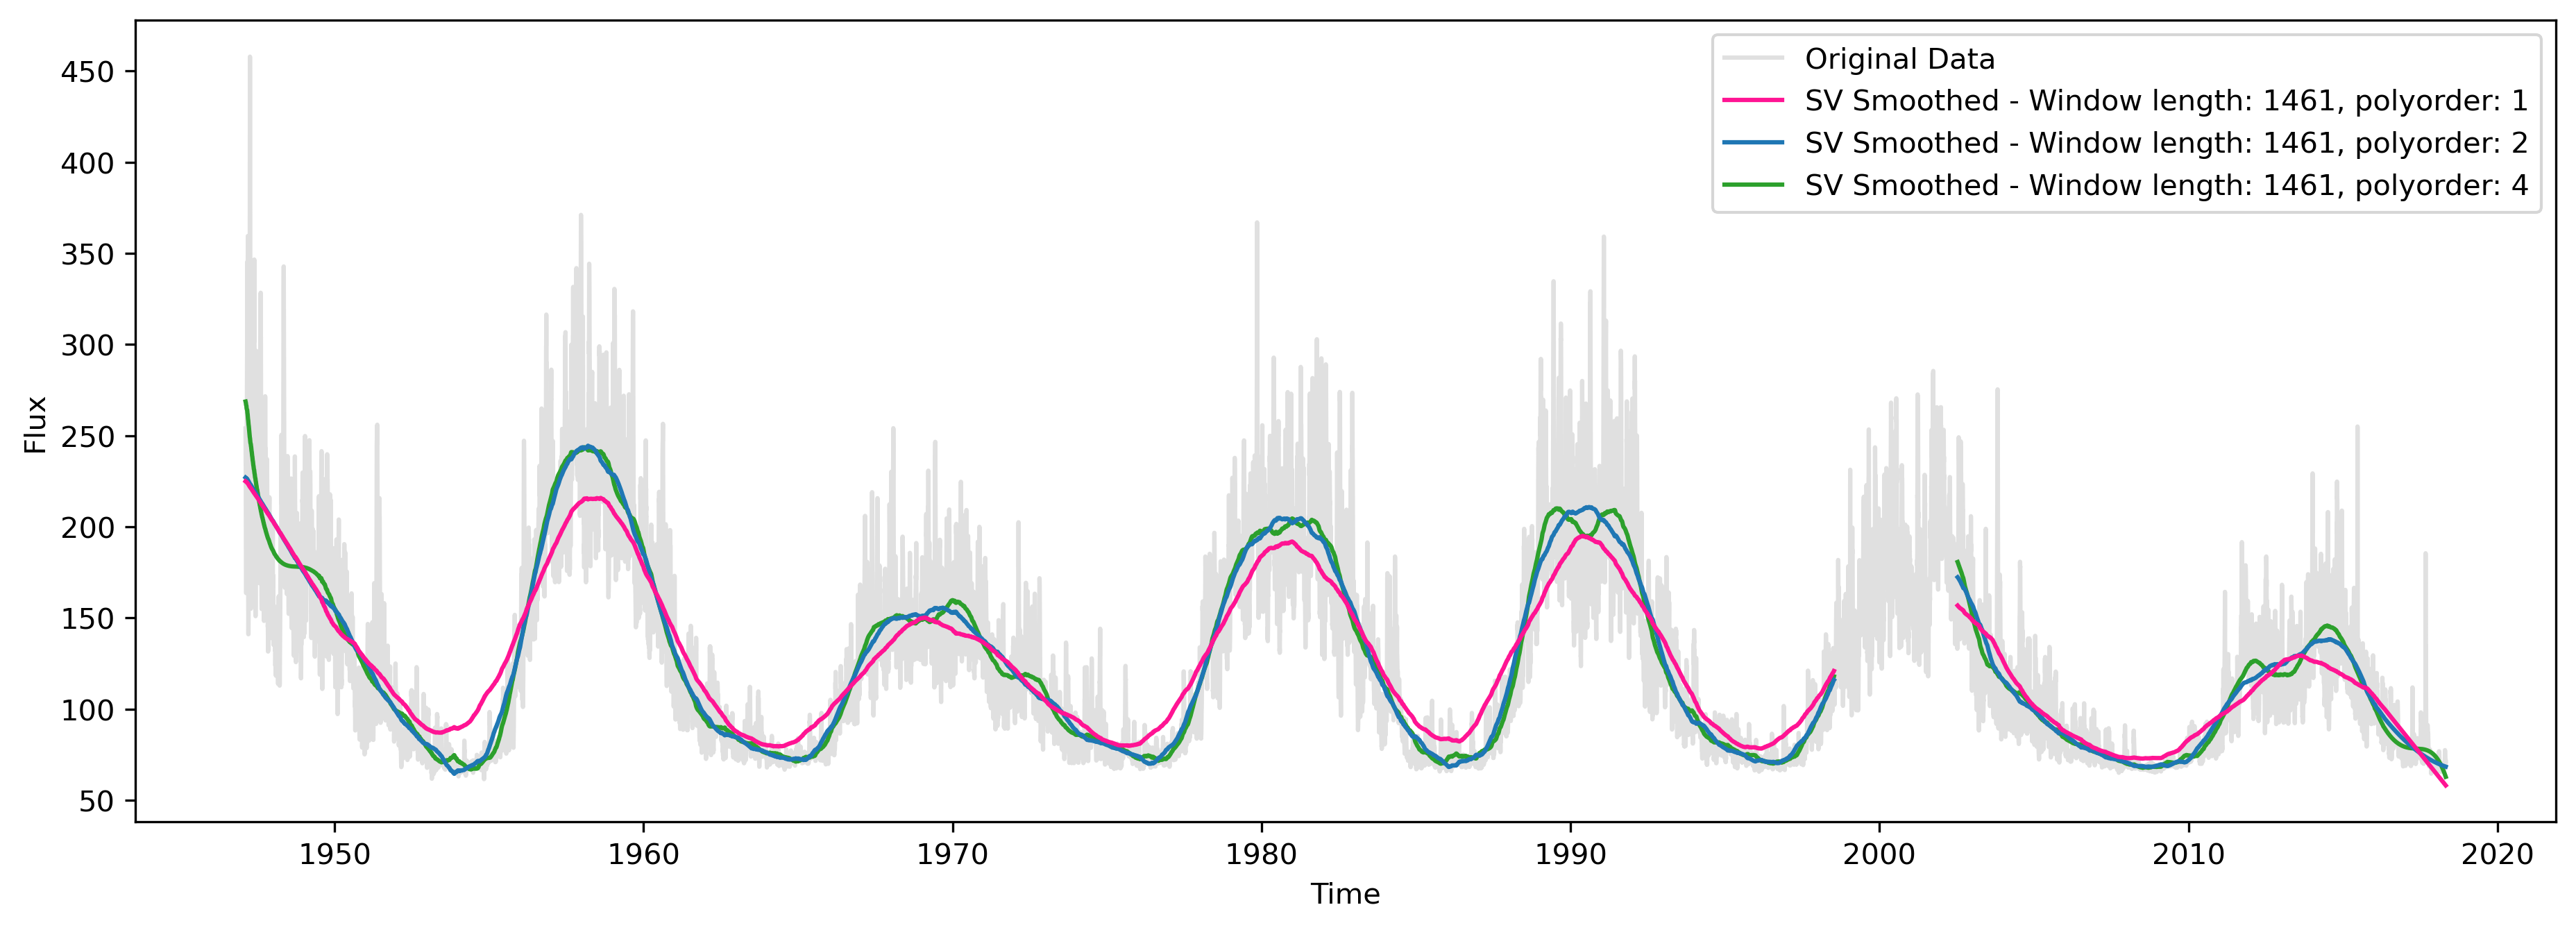

In [35]:
alpha=0.7 # determines opacity
 
fig, ax = plt.subplots(dpi=300, figsize=[15, 5])
ax.plot(time, flux_adj, alpha=alpha, label='Original Data', color=color[-1])
for i in range(size):
    ax.plot(time, smoothed[i],
        label=f'SV Smoothed - Window length: {window_length}, polyorder: {poly_order[i]}', 
       zorder=zorder[i], color = color[i])
ax.set_xlabel('Time')
ax.set_ylabel('Flux')
ax.legend();
#fig.savefig('svg_plot.png');